# **Crime Stats of South Africa 2011-2023**

# Questions:


1.   Which province reports the most crime overall?
2.   What crime category is the most reported?

1.   How have the crime rates changed over time?
2.   Which crimes have increased or decreased between 2011-2023?







## Notebook Content

**Step1**: Installing and importing necessary libraries

**Step2**: Reading, exploring and preparing data.

**Step3**: Exploratory data analysis and Visualization

**Step4: 2011-2023 Crime statistics EDA summmary**



# **Step1**: **Importing Necessary libraries**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Uploading csv file
from google.colab import files
uploaded = files.upload()

Saving crime_incidents_by_category.csv to crime_incidents_by_category.csv


# **STEP2: Reading, exploring and preparing data**

In [3]:
data= pd.read_csv('crime_incidents_by_category.csv')

In [4]:
data.head(10)

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
5,ZA,Contact Crimes,2016/2017,608321
6,ZA,Contact Crimes,2017/2018,601366
7,ZA,Contact Crimes,2018/2019,617210
8,ZA,Contact Crimes,2019/2020,621282
9,ZA,Contact Crimes,2020/2021,535217


In [5]:
data.tail(10)

,Geography,Crime Category,Financial Year,Count
830,NC,Property Related Crimes,2022/2023,12510
831,NC,Other Serious Crimes,2022/2023,11876
832,NC,Crimes Detected as a Result of Police Action,2022/2023,2901
833,WC,Contact Crimes,2022/2023,112707
834,WC,Sexual Offences,2022/2023,7310
835,WC,Aggravated Robberies,2022/2023,7150
836,WC,Contact Related Crimes,2022/2023,28595
837,WC,Property Related Crimes,2022/2023,66272
838,WC,Other Serious Crimes,2022/2023,96174
839,WC,Crimes Detected as a Result of Police Action,2022/2023,79106


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       840 non-null    object
 1   Crime Category  840 non-null    object
 2   Financial Year  840 non-null    object
 3   Count           840 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.4+ KB


In [7]:
#Checking for missing values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Geography,0
Crime Category,0
Financial Year,0
Count,0


In [16]:
# Checking for duplicates
data.duplicated().sum()

np.int64(0)

# **Question1: Which Province reported the most crimes?**

In [8]:
#Create a dataframe, group by geography and crime count sum, then sort values in descending order.
crime_count= data.groupby('Geography')['Count'].sum().reset_index(name='count').sort_values(by='count', ascending=False)

#Display the dataframe with crime count per province
crime_count.reset_index(drop=True).style.bar()



,Geography,count
0,ZA,25847055
1,GT,7274899
2,WC,5502038
3,KZN,4153161
4,EC,2723932
5,LIM,1492403
6,MP,1451499
7,FS,1422327
8,NW,1410042
9,NC,606367


Text(0.5, 1.0, 'Crime Count per Province (2011-2023)')

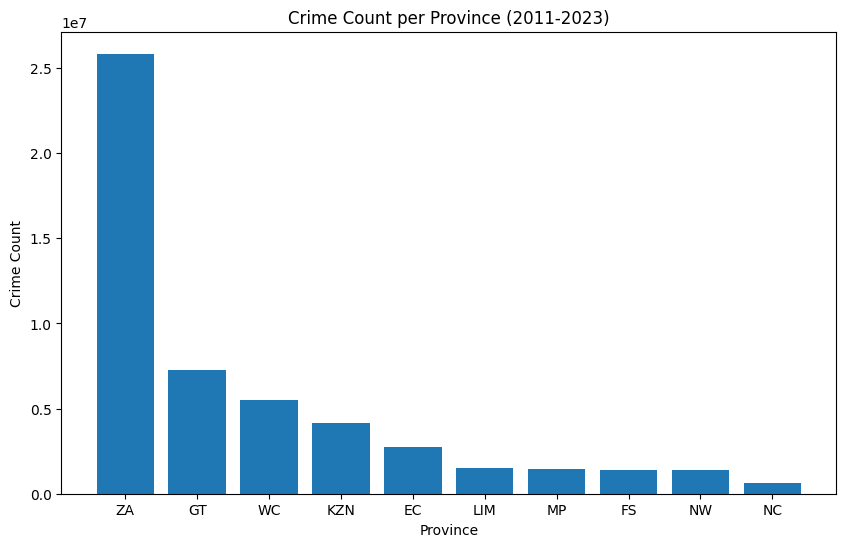

In [9]:
# Create a bar graph displaying crime count per province
plt.figure(figsize=(10, 6))
plt.bar(crime_count['Geography'], crime_count['count'])
plt.xlabel('Province')
plt.ylabel('Crime Count')
plt.title('Crime Count per Province (2011-2023)')

The graph shows that Gauteng(GT) reported the most crimes, followed by Western Cape(WC) and Northern Cape with the lowest reported crimes.

# **Question 2: Which crime category is most reported?**

In [10]:
#Create dataframe, group by crime category and sum of crime count
total_by_category= data.groupby('Crime Category')['Count'].sum().reset_index(name='Crime Count').sort_values(by='Crime Count', ascending=False)

#Show results
print('Total crime count per category:\n')
total_by_category.reset_index(drop=True).style.bar()

Total crime count per category:



,Crime Category,Crime Count
0,Contact Crimes,14641294
1,Property Related Crimes,11733250
2,Other Serious Crimes,10997798
3,Crimes Detected as a Result of Police Action,7564641
4,Contact Related Crimes,2857450
5,Aggravated Robberies,2805498
6,Sexual Offences,1283792


In [11]:
print(total_by_category.columns)

Index(['Crime Category', 'Crime Count'], dtype='object')


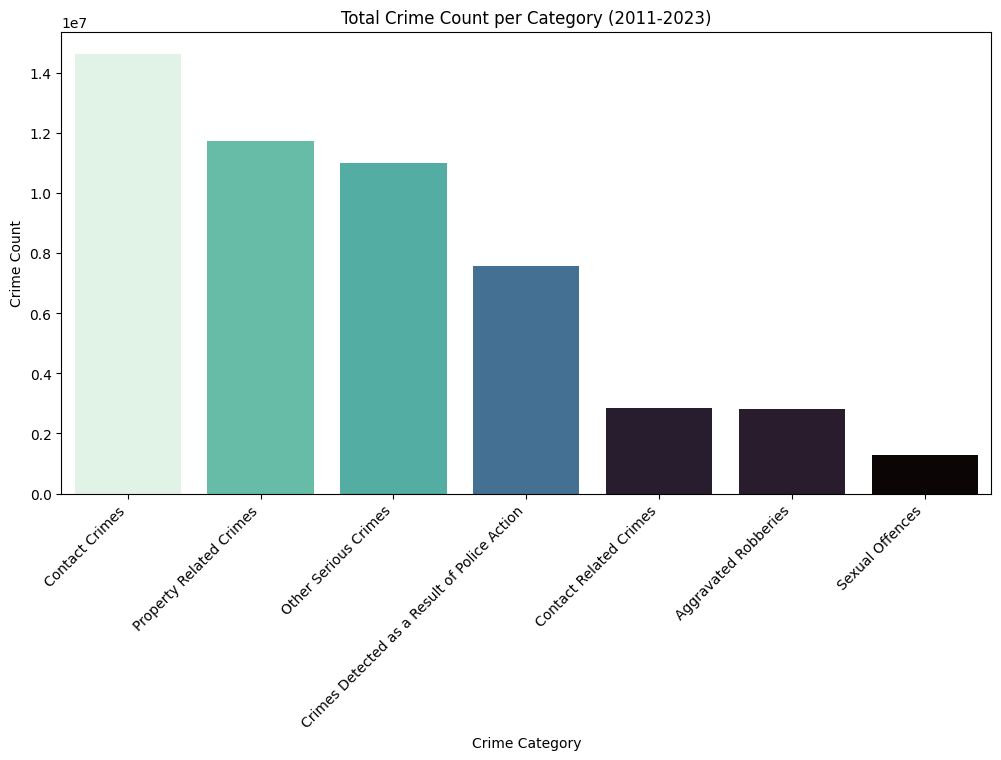

In [12]:
#Create a bar graph displaying total crime count per category
total_by_category.columns=['Crime Count', 'Crime_Category']
total_by_category['hue_group']= total_by_category['Crime_Category']

plt.figure(figsize=(12,6))
sns.barplot(data=total_by_category, x='Crime Count', y='Crime_Category',hue='hue_group', palette='mako', legend=False)
plt.xlabel('Crime Category')
plt.ylabel('Crime Count')
plt.title('Total Crime Count per Category (2011-2023)')
#Rotate the x-axis for better visibility
plt.xticks(rotation=45, ha='right')

#Display the graph
plt.show()



The graph shows that **'Contact crimes'** were the most reported crimes with **'Sexual offences'** being the least reported crimes.

# **Question3: How have the crime rates changed over time?**

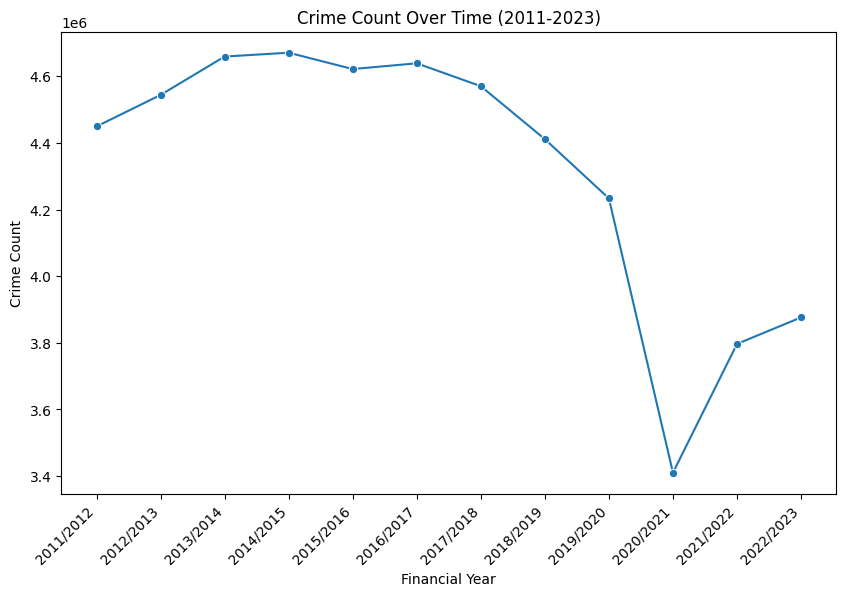

In [13]:
crime_over_time= data.groupby('Financial Year')['Count'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=crime_over_time, x='Financial Year', y='Count', marker='o')
plt.xlabel('Financial Year')
plt.ylabel('Crime Count')
plt.title('Crime Count Over Time (2011-2023)')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows the trend in crime counts in South Africa from the 2011/2012 to the 2022/2023 financial years. Crime steadily increased from 2011/2012, peaking around 2014/2015, followed by a relatively stable period until 2018/2019. A sharp decline occurred between 2019/2020 and 2020/2021, likely due to COVID-19 lockdown restrictions. In the two most recent years (2021/2022 and 2022/2023), crime counts began rising again, indicating a gradual return to pre-pandemic levels.


# **Question 4: Which crimes have increased or decreased between 2011 and 2023?**

In [14]:
#Filter years of interest

years_of_interest=['2011/2012', '2022/2023']
filtered_data= data[data['Financial Year'].isin(years_of_interest)]

#Group Crime category by year and sum the crime counts
grouped= filtered_data.groupby(['Crime Category', 'Financial Year'])['Count'].sum().unstack()

#Drop any rows with missing data
grouped= grouped.dropna()

#Creating a new column for change
grouped['Change']= grouped['2022/2023']- grouped['2011/2012']

#Sorting by change to see which crimes increased or decreased
grouped= grouped.sort_values('Change', ascending=False)

#Show results
print(grouped)

Financial Year                                2011/2012  2022/2023  Change
Crime Category                                                            
Contact Crimes                                  1231870    1307318   75448
Sexual Offences                                  121078     107776  -13302
Contact Related Crimes                           251806     237632  -14174
Aggravated Robberies                             201538     136030  -65508
Crimes Detected as a Result of Police Action     525452     457966  -67486
Other Serious Crimes                            1056592     874076 -182516
Property Related Crimes                         1061248     755380 -305868


Based on the results of the analysis, here's what we can say about changes in crime between the 2011/2012 and 2022/2023 financial years:

1. Crimes that Increased:
Contact Crimes increased by 75,448 cases, indicating a rise in violent interpersonal offenses (e.g., assault, murder).

2. Crimes that Decreased:
Property Related Crimes saw the largest drop, decreasing by 305,868.

3. Other Serious Crimes declined significantly by 182,516 cases.

4. Crimes Detected as a Result of Police Action dropped by 67,486, possibly reflecting reduced law enforcement activity or fewer proactive operations.

5. Aggravated Robberies fell by 65,598, which may suggest changes in criminal tactics or police visibility.

6. Contact Related Crimes dropped slightly by 14,174.

7. Sexual Offences decreased by 13,302.